In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Starting Visualizations...")

Starting Visualizations...


In [2]:
# Load cleaned dataset
df = pd.read_csv('../data/processed/heart_disease_cleaned.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Dataset shape: (303, 17)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_above_50', 'high_chol', 'low_heart_rate']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_above_50,high_chol,low_heart_rate
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,1,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,1,1,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,1,0


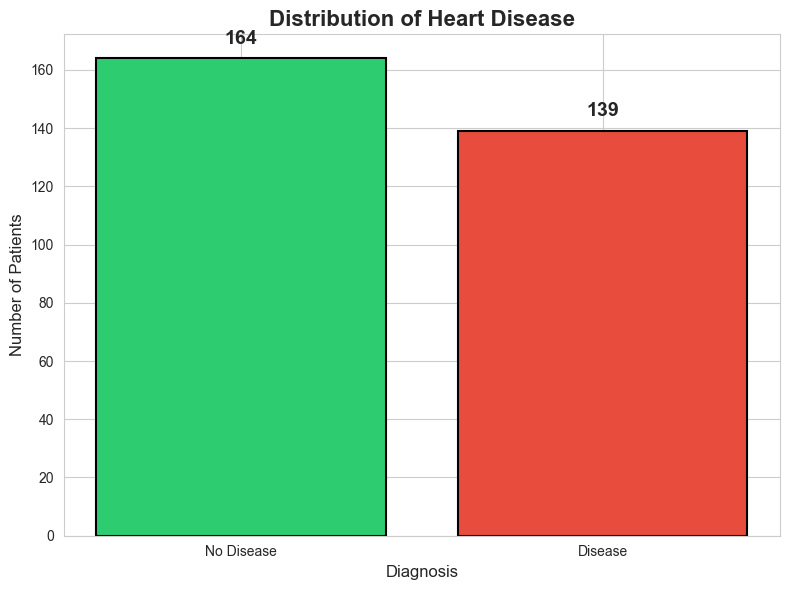

No Disease: 164 (54.1%)
Disease: 139 (45.9%)


In [3]:
# Target variable distribution
plt.figure(figsize=(8, 6))
colors = ['#2ecc71', '#e74c3c']
counts = df['target'].value_counts()

plt.bar(['No Disease', 'Disease'], counts.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Distribution of Heart Disease', fontsize=16, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=12)
plt.xlabel('Diagnosis', fontsize=12)

# Add count labels on bars
for i, v in enumerate(counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"No Disease: {counts[0]} ({counts[0]/len(df)*100:.1f}%)")
print(f"Disease: {counts[1]} ({counts[1]/len(df)*100:.1f}%)")

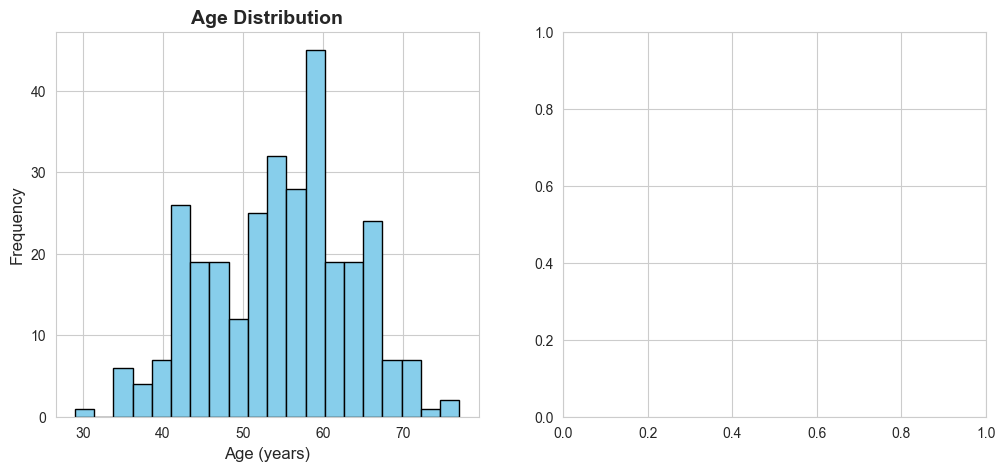

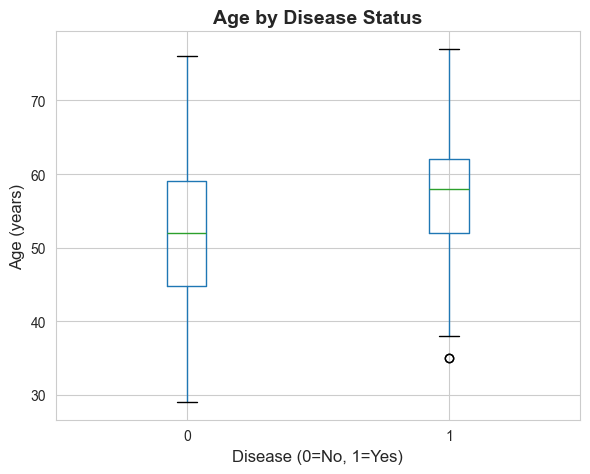

Observation: Patients with disease tend to be slightly older


In [4]:
# Age distribution by disease status
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
df.boxplot(column='age', by='target', figsize=(6, 5))
plt.title('Age by Disease Status', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Disease (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)

plt.tight_layout()
plt.savefig('../reports/figures/02_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Observation: Patients with disease tend to be slightly older")

<Figure size 1000x600 with 0 Axes>

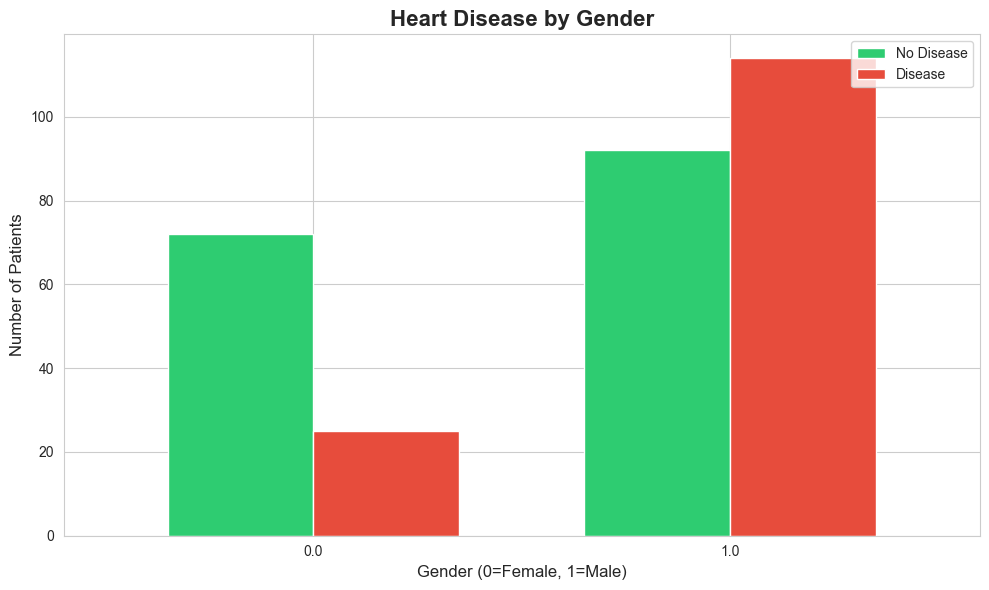

Males have higher disease rate than females


In [5]:
# Disease by gender
plt.figure(figsize=(10, 6))

gender_disease = df.groupby(['sex', 'target']).size().unstack()
gender_disease.plot(kind='bar', color=['#2ecc71', '#e74c3c'], width=0.7)

plt.title('Heart Disease by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender (0=Female, 1=Male)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(['No Disease', 'Disease'], loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('../reports/figures/03_gender_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Males have higher disease rate than females")

<Figure size 1000x600 with 0 Axes>

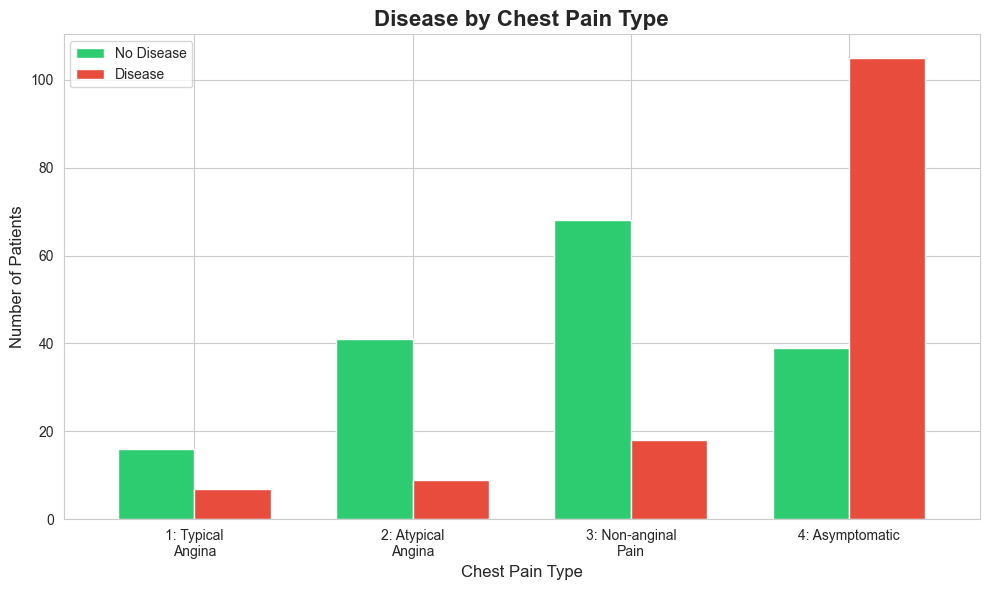

Asymptomatic (type 4) shows highest disease rate


In [6]:
# Chest pain type analysis
plt.figure(figsize=(10, 6))

cp_disease = df.groupby(['cp', 'target']).size().unstack()
cp_disease.plot(kind='bar', color=['#2ecc71', '#e74c3c'], width=0.7)

plt.title('Disease by Chest Pain Type', fontsize=16, fontweight='bold')
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(['No Disease', 'Disease'], loc='upper left')
plt.xticks(rotation=0)

# Add labels
labels = ['1: Typical\nAngina', '2: Atypical\nAngina', '3: Non-anginal\nPain', '4: Asymptomatic']
plt.gca().set_xticklabels(labels)

plt.tight_layout()
plt.savefig('../reports/figures/04_chest_pain_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Asymptomatic (type 4) shows highest disease rate")

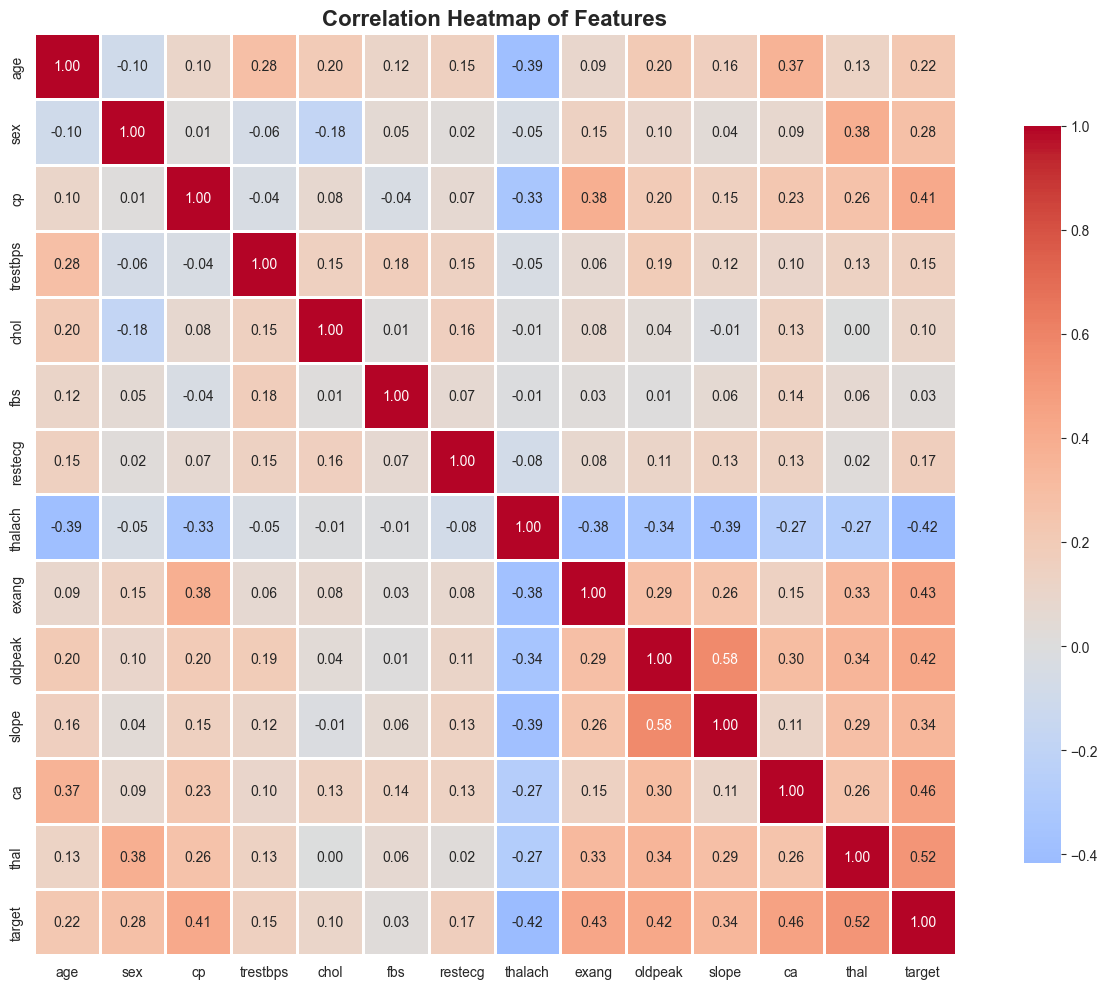

Strong correlations: thal, ca, cp, oldpeak, exang with target


In [7]:
# Correlation matrix
plt.figure(figsize=(14, 10))

# Select only original features for cleaner heatmap
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

corr_matrix = df[features].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/05_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Strong correlations: thal, ca, cp, oldpeak, exang with target")

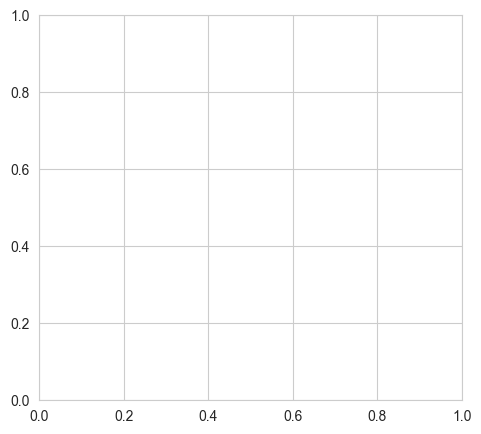

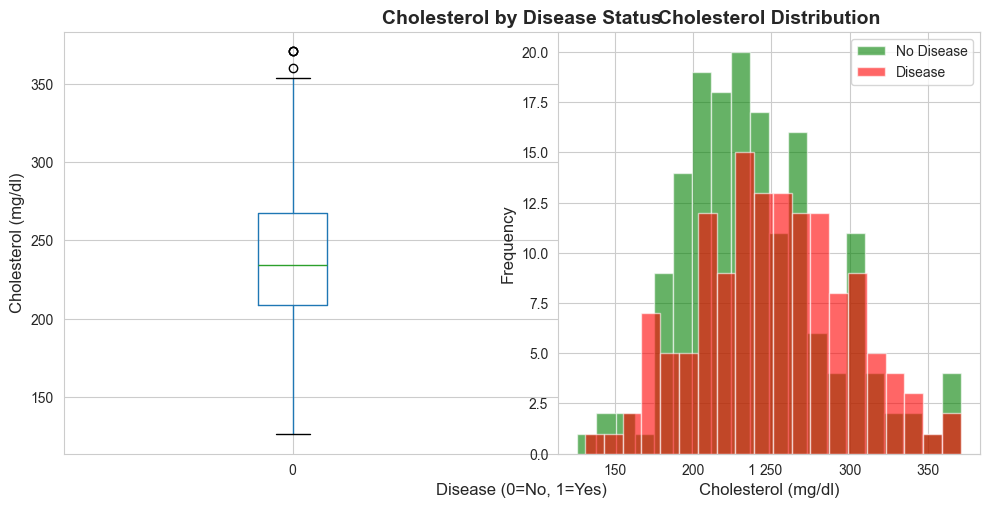

Cholesterol levels show overlap between groups


In [8]:
# Cholesterol by disease status
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot(column='chol', by='target')
plt.title('Cholesterol by Disease Status', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Disease (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)

plt.subplot(1, 2, 2)
df[df['target']==0]['chol'].hist(bins=20, alpha=0.6, label='No Disease', color='green')
df[df['target']==1]['chol'].hist(bins=20, alpha=0.6, label='Disease', color='red')
plt.title('Cholesterol Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Cholesterol (mg/dl)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.tight_layout()
plt.savefig('../reports/figures/06_cholesterol_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Cholesterol levels show overlap between groups")

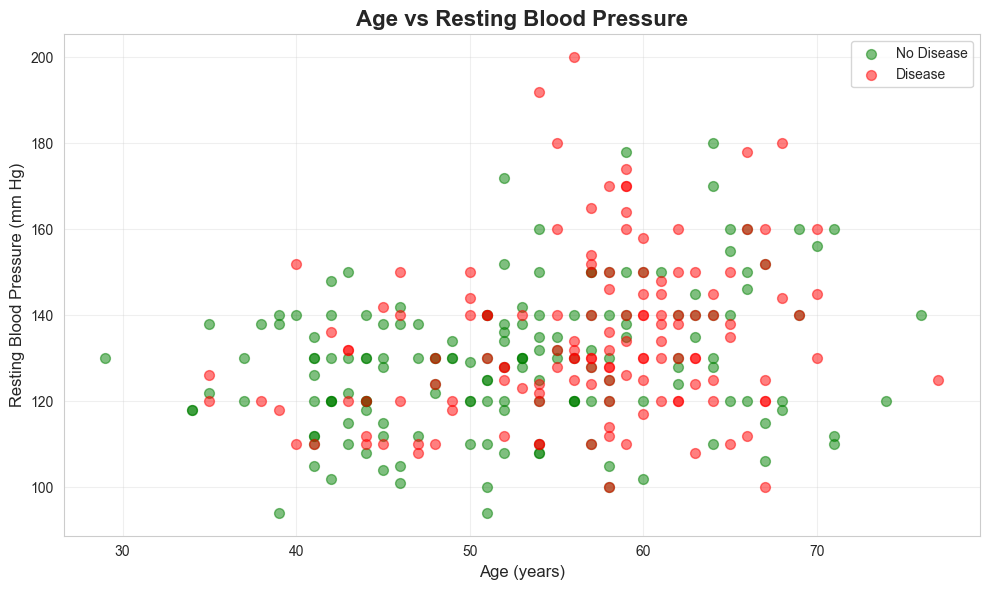

No clear linear separation between groups


In [9]:
# Blood pressure analysis
plt.figure(figsize=(10, 6))

plt.scatter(df[df['target']==0]['age'], df[df['target']==0]['trestbps'], 
            c='green', alpha=0.5, label='No Disease', s=50)
plt.scatter(df[df['target']==1]['age'], df[df['target']==1]['trestbps'], 
            c='red', alpha=0.5, label='Disease', s=50)

plt.title('Age vs Resting Blood Pressure', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Resting Blood Pressure (mm Hg)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/figures/07_bp_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("No clear linear separation between groups")

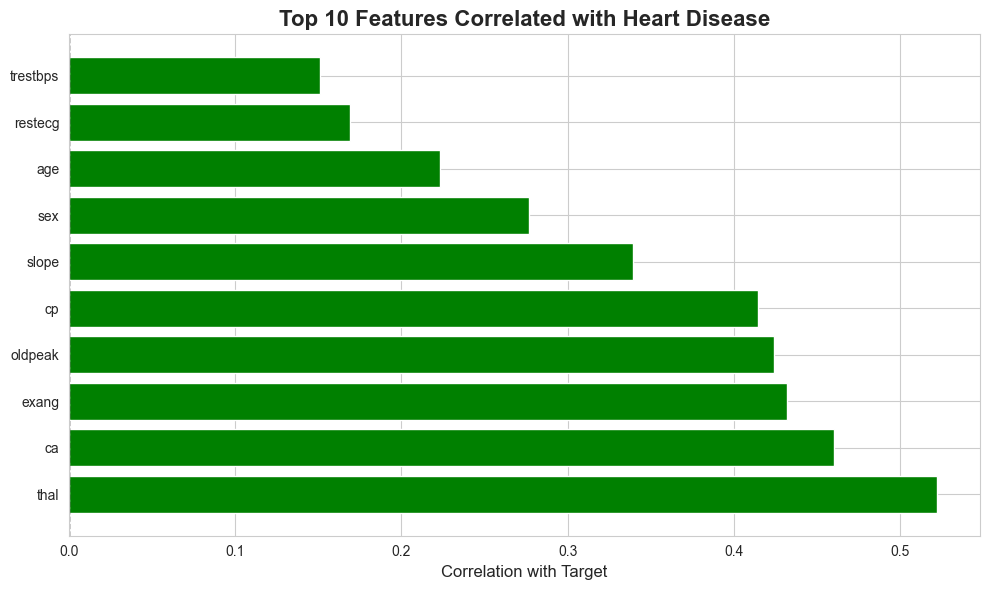

thal, ca, exang, oldpeak, cp are top predictors


In [10]:
# Top correlations with target
plt.figure(figsize=(10, 6))

correlations = df[features].corr()['target'].sort_values(ascending=False)[1:]
top_features = correlations.head(10)

colors_corr = ['red' if x < 0 else 'green' for x in top_features.values]
plt.barh(range(len(top_features)), top_features.values, color=colors_corr)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Correlation with Target', fontsize=12)
plt.title('Top 10 Features Correlated with Heart Disease', fontsize=16, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig('../reports/figures/09_feature_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

print("thal, ca, exang, oldpeak, cp are top predictors")

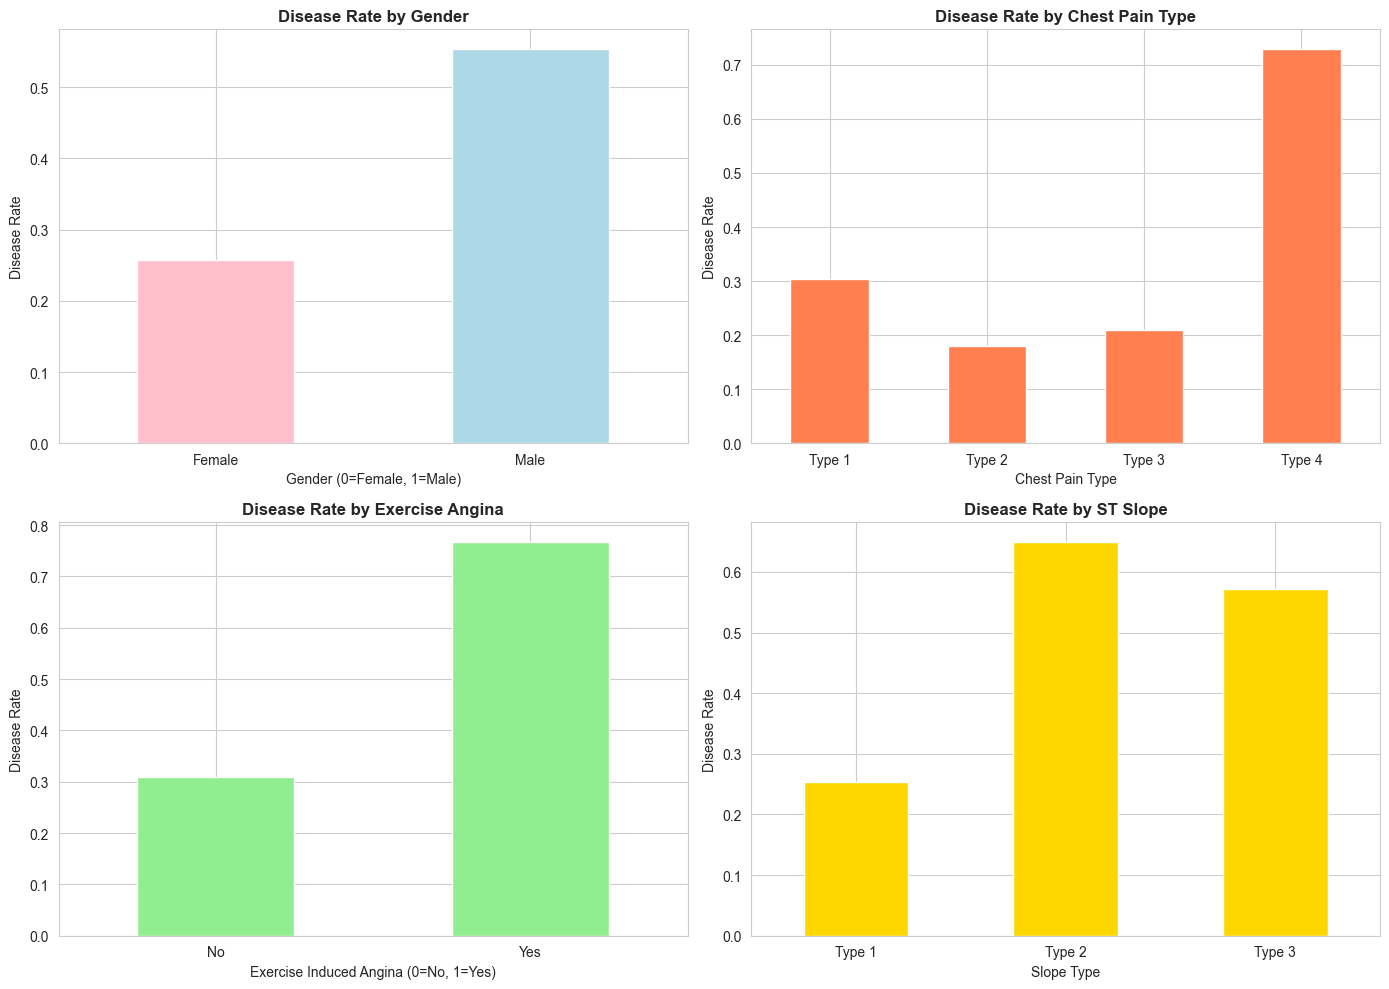

Multiple features show clear disease rate differences


In [11]:
# Multiple feature comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Sex
df.groupby('sex')['target'].mean().plot(kind='bar', ax=axes[0,0], color=['pink', 'lightblue'])
axes[0,0].set_title('Disease Rate by Gender', fontweight='bold')
axes[0,0].set_xlabel('Gender (0=Female, 1=Male)')
axes[0,0].set_ylabel('Disease Rate')
axes[0,0].set_xticklabels(['Female', 'Male'], rotation=0)

# Plot 2: Chest pain
df.groupby('cp')['target'].mean().plot(kind='bar', ax=axes[0,1], color='coral')
axes[0,1].set_title('Disease Rate by Chest Pain Type', fontweight='bold')
axes[0,1].set_xlabel('Chest Pain Type')
axes[0,1].set_ylabel('Disease Rate')
axes[0,1].set_xticklabels(['Type 1', 'Type 2', 'Type 3', 'Type 4'], rotation=0)

# Plot 3: Exercise angina
df.groupby('exang')['target'].mean().plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Disease Rate by Exercise Angina', fontweight='bold')
axes[1,0].set_xlabel('Exercise Induced Angina (0=No, 1=Yes)')
axes[1,0].set_ylabel('Disease Rate')
axes[1,0].set_xticklabels(['No', 'Yes'], rotation=0)

# Plot 4: Slope
df.groupby('slope')['target'].mean().plot(kind='bar', ax=axes[1,1], color='gold')
axes[1,1].set_title('Disease Rate by ST Slope', fontweight='bold')
axes[1,1].set_xlabel('Slope Type')
axes[1,1].set_ylabel('Disease Rate')
axes[1,1].set_xticklabels(['Type 1', 'Type 2', 'Type 3'], rotation=0)

plt.tight_layout()
plt.savefig('../reports/figures/10_multiple_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("Multiple features show clear disease rate differences")

In [12]:
# Visualization summary
print("="*70)
print("VISUALIZATION SUMMARY")
print("="*70)
print("Total charts created: 10")
print("\nCharts saved in reports/figures/:")
print("1. Target distribution")
print("2. Age distribution")
print("3. Gender analysis")
print("4. Chest pain analysis")
print("5. Correlation heatmap")
print("6. Cholesterol analysis")
print("7. Blood pressure scatter")
print("8. Heart rate analysis")
print("9. Feature correlations")
print("10. Multiple features comparison")


VISUALIZATION SUMMARY
Total charts created: 10

Charts saved in reports/figures/:
1. Target distribution
2. Age distribution
3. Gender analysis
4. Chest pain analysis
5. Correlation heatmap
6. Cholesterol analysis
7. Blood pressure scatter
8. Heart rate analysis
9. Feature correlations
10. Multiple features comparison
